# Discovery of the dataset QA

---


In [1]:
import os

os.chdir("/home/onyxia/work/Advanced_ML_Project/")
os.getcwd()

'/home/onyxia/work/Advanced_ML_Project'

## Imports

In [2]:
from src.adapter.data import load_dataset_TriviaQA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

/opt/python/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Analyze datasets 

In [3]:
training_dataset, test_dataset = load_dataset_TriviaQA(dataset_name="trivia_qa", seed=42)

In [4]:

def analyze_dataset(dataset, name="Dataset", text_columns=None, n_examples=3):
    """
    Analyze the datasets
    """
    print("=" * 80)
    print(f"📊 Dataset : {name}")
    print("=" * 80)

    df = pd.DataFrame(dataset)

    print("\n🔹 size of the dataset ")
    print(f"Number of lines : {len(df)}")
    print(f"Number of columns : {len(df.columns)}")

    print("\n🔹 Columns and types")
    print(df.dtypes)

    print("\n🔹 Missing Values")
    missing = df.isnull().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

    print("\n🔹 Exemples")
    display(df.head(n_examples))

    print("\n🔹 Statistics")
    display(df.describe())

    if text_columns is None:
        text_columns = df.select_dtypes(include="object").columns.tolist()

    print("\n🔹 Textual columns :", text_columns)

    for col in text_columns:
        if col =="answers":
            lengths = df[col].dropna().apply(lambda x: len(str(x['text'][0]).split()))
        else:
            lengths = df[col].dropna().apply(lambda x: len(str(x).split()))

        print(f"\n📝 Column : {col}")
        print(f"Mean number of words : {lengths.mean():.2f}")
        print(f"Min / Max : {lengths.min()} / {lengths.max()}")

        # Histogram
        plt.figure()
        plt.hist(lengths, bins=50)
        plt.title(f"word length distribution - {col}")
        plt.xlabel("Number of words")
        plt.ylabel("Frequency")
        plt.grid()
        plt.show()

    for col in df.columns:
        if df[col].dtype != "object" and df[col].nunique() < 20:
            print(f"\n🏷️ Distribution of {col}")
            print(df[col].value_counts())

    print("Done ")

📊 Dataset : TriviaQA - Train

🔹 size of the dataset 
Number of lines : 12294
Number of columns : 4

🔹 Columns and types
id          object
question    object
context     object
answers     object
dtype: object

🔹 Missing Values
No missing values

🔹 Exemples


,id,question,context,answers
0,sfq_11266--70/70_1721778.txt#0_0,The ancient Greek writer Apollonius of Perga w...,[DOC] [TLE] Apollonius of Perga - University o...,"{'answer_start': [263], 'text': ['mathematics']}"
1,bb_1220--63/63_857755.txt#0_0,"The Qur'an (or Quran, Kuran, Koran, Coran or a...",[DOC] [TLE] Quran (Complete) - YouTubeQuran (C...,"{'answer_start': [300], 'text': ['islam']}"
2,qw_13019--199/199_1289853.txt#0_1,When did the Canadian Charter of Rights and Fr...,The Canadian Charter of Rights is also exclusi...,"{'answer_start': [1679], 'text': ['1982']}"



🔹 Statistics


,id,question,context,answers
count,12294,12294,12294,12294
unique,12294,6960,12241,12233
top,sfq_11266--70/70_1721778.txt#0_0,Which Aztec ruler was deposed by Cortez?,[DOC] [TLE] DavidDavid (; ; ISO 259-3 Dawid; ;...,"{'answer_start': [771], 'text': ['jesse']}"
freq,1,6,3,3



🔹 Textual columns : ['question', 'answers']

📝 Column : question
Mean number of words : 13.15
Min / Max : 5 / 128


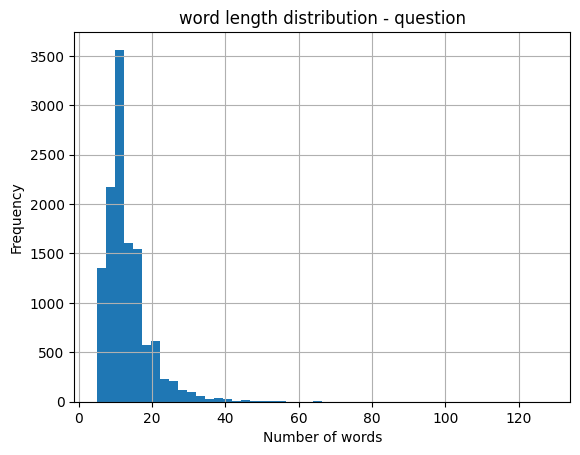


📝 Column : answers
Mean number of words : 1.47
Min / Max : 1 / 9


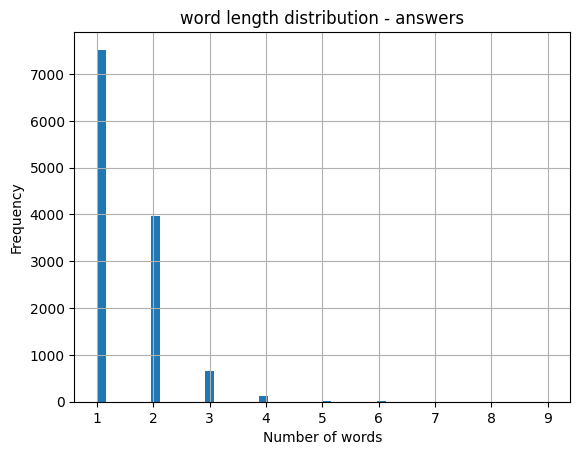

Done 


In [5]:
analyze_dataset(
    training_dataset,
    name="TriviaQA - Train",
    text_columns=["question", "answers"]
)

📊 Dataset : TriviaQA - Test

🔹 size of the dataset 
Number of lines : 3074
Number of columns : 4

🔹 Columns and types
id          object
question    object
context     object
answers     object
dtype: object

🔹 Missing Values
No missing values

🔹 Exemples


,id,question,context,answers
0,odql_12408--111/111_2309036.txt#0_2,Who is the current occupant of Dorneywood in B...,The Dorneywood Trust has the objective of '...,"{'answer_start': [1773], 'text': ['george osbo..."
1,qb_9473--125/125_527641.txt#0_0,Who is Head of State of New Zealand?,7 million is of European descent; the indigeno...,"{'answer_start': [828], 'text': ['elizabeth ii']}"
2,qw_9997--5/5_1236369.txt#0_0,"On 31 May 2010, the President of which country...",[DOC] [TLE] Christian Wulff named new Presiden...,"{'answer_start': [1239], 'text': ['germany']}"



🔹 Statistics


,id,question,context,answers
count,3074,3074,3074,3074
unique,3074,2678,3069,3072
top,odql_12408--111/111_2309036.txt#0_2,In which American state is Yale University,"Many of the terms did catch on, and the lists...","{'answer_start': [426], 'text': ['george iv']}"
freq,1,3,2,2



🔹 Textual columns : ['question', 'answer']

📝 Column : question
Mean number of words : 13.07
Min / Max : 5 / 128


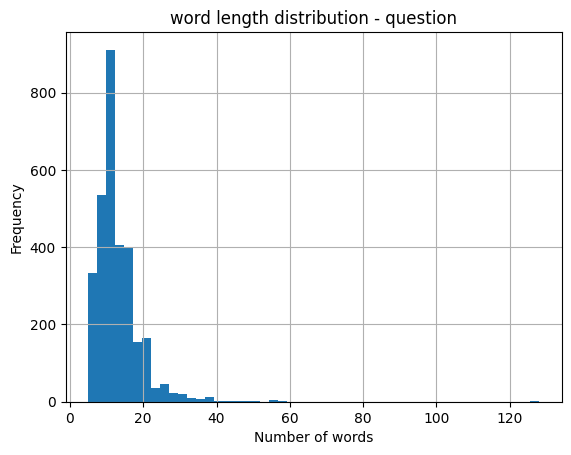

KeyError: 'answer'

In [6]:
analyze_dataset(
    test_dataset,
    name="TriviaQA - Test",
    text_columns=["question", "answer"]
)
